# Logistic Regression

In this exercise, you will implement logistic regression with regularization and apply different methods to get the optimal parameters


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Logistic Regression](#2)
  - [ 2.1 How it works](#2.1)
  - [ 2.2 Regularization in logistic rgresion](#2.2)
  - [ 2.3  Sigmoid function](#2.3)
  - [ 2.8 Evaluating logistic regression](#2.8)
- [ 3 - Regularized Logistic Regression](#3)
  - [ 3.1 Problem Statement](#3.1)
  - [ 3.2 Loading and visualizing the data](#3.2)
  - [ 3.3 Feature mapping](#3.3)
  - [ 3.4 Cost function for regularized logistic regression](#3.4)
  - [ 3.5 Gradient for regularized logistic regression](#3.5)
  - [ 3.6 Learning parameters using gradient descent](#3.6)
  - [ 3.7 Plotting the decision boundary](#3.7)
  - [ 3.8 Evaluating regularized logistic regression model](#3.8)
- [ 4 - Solution of logistic regression with Nelder-Mead method](#4)
- [ 5 - Testing a subset of the dataset](#5)
- [ 6 - Tasks](#6)


<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [JAX](https://jax.readthedocs.io/en/latest/) for automatic diferentiation.  
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
-  ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.

JAx and numpy will be called alternately.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/MLCourse/Clase4y5Trabajo/
# %pwd

In [2]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from utils import *
import copy
import math
import time
%matplotlib inline

<a name="2"></a>
## 2 - Logistic Regression


Logistic regression is a supervised learning model primarily used for binary classification problems, though it can also be extended to multiclass classification problems.

- **Main Purpose** The objective of logistic regression is to predict the probability that an observation belongs to one of two possible classes. This is achieved by modeling the relationship between one or more independent variables (predictors) and a binary dependent variable (outcome) that takes values of 0 or 1.

<a name="2.1"></a>
### 2.1 - How It Works

1. **Sigmoid Function**: Logistic regression uses the sigmoid function to map any input value to a range of 0 to 1. The sigmoid function is defined as:

   $$
   g(z) = \frac{1}{1 + e^{-z}}
   $$

   where $ z$ is a linear combination of the predictor variables.

2. **Probability**: The output of the sigmoid function can be interpreted as the probability that the observation belongs to class 1. If the probability is greater than 0.5, the observation is classified into class 1; otherwise, it is classified into class 0.

3. **Maximum Likelihood and Cost Function**: The logistic regression model is fitted to the data using a method called maximum likelihood, which seeks the parameters of the model that maximize the probability of observing the given data. The cost function minimized in this process is **cross-entropy**.

   The cross-entropy cost function for \( m \) samples is defined as:

   $$
   J(\mathbf{w}) = -\frac{1}{m} \sum_{i=0}^{m-1} \left[ y^{(i)} \log(g_\mathbf{w}(x^{(i)})) + (1 - y^{(i)}) \log(1 - g_\mathbf{w}(x^{(i)})) \right]
   $$

   where:
   - $ y^{(i)} $  is the actual class label for the $i$-th sample.
   -  $ g_\mathbf{w}(x^{(i)}) $ is the model's output (the estimated probability that the $i$-th sample belongs to class 1).
   -  $x^{(i)}$ are the features of the $i$-th sample.

#### Decision Boundary

The decision boundary in logistic regression is the threshold that separates different classes. For binary classification, this boundary is the point where the estimated probability is 0.5. In feature space, the decision boundary is a line (in 2D) or a hyperplane (in higher dimensions) that divides the classes.



#### Common Applications

- Medical diagnosis (e.g., predicting if a patient has a disease)
- Marketing analysis (e.g., determining if a customer will buy a product)
- Credit scoring systems (e.g., assessing the risk of loan default)

#### Advantages and limitations


##### Advantages
- Handles nonlinear relationships between predictor variables and the response variable well through the sigmoid transformation.
- It is interpretable, as the coefficients of logistic regression indicate the impact of each predictor on the probability of belonging to class 1.

##### Limitations


- Can be sensitive to outliers and collinearity among predictor variables.
- **Limitation**: Logistic regression assumes a linear relationship between the predictor variables and the logit of the response variable. This assumption can be too restrictive in many cases.

- **Solution**: To address this limitation, **feature mapping** can be used. This process involves creating new features from the existing ones to capture nonlinear relationships. For example, if there are two features $ x_1 $ and $ x_2 $, new features such as $ x_1^2 $, $ x_2^2 $, $ x_1 x_2 $, etc., can be created.

  While feature mapping can significantly improve the model's performance, it can be challenging to know how to create these new features. Choosing the correct combinations and the degree of transformations can require deep domain knowledge and trial-and-error techniques.

<a name="2.2"></a>
### 2.2 - Regularization in Logistic Regression

When a logistic regression model is too complex, such as when it has too many features (especially when using feature mapping), it can fit the training data too closely. This leads to overfitting, where the model performs well on training data (known data) but poorly on new, unseen data.

Regularization is a technique used to prevent overfitting by adding a penalty term to the cost function. In logistic regression, the most common forms of regularization are L1 (Lasso) and L2 (Ridge) regularization.




#### Regularization Types

1. **L1 Regularization (Lasso)**: Adds a penalty equal to the absolute value of the magnitude of coefficients. It can lead to sparse models where some feature coefficients are exactly zero, effectively performing feature selection.

2. **L2 Regularization (Ridge)**: Adds a penalty equal to the square of the magnitude of coefficients. It tends to shrink the coefficients of correlated features toward each other.



   where:
   - \( $\lambda \$) is the regularization parameter that controls the strength of the penalty. Higher values of \( \lambda \) increase the regularization effect.

#### Example with Feature Mapping

Let's consider an example where we use feature mapping in logistic regression with L2 regularization.


Suppose we have two original features, \( x_1 \) and \( x_2 \).


We create additional features to capture non-linear relationships:

$$
x_1, x_2, x_1^2, x_2^2, x_1 x_2
$$


The regularized cost function for our feature-mapped logistic regression model with L2 regularization is:


   $$
   J(\mathbf{w}) = -\frac{1}{m} \sum_{i=0}^{m-1} \left[ y^{(i)} \log(f_\mathbf{w}(x^{(i)})) + (1 - y^{(i)}) \log(1 - f_\mathbf{w}(x^{(i)})) \right] + \frac{\lambda}{2} \sum_{j=1}^{n} w_j^2
   $$

To train the model, we minimize this regularized cost function. The regularization term \( \frac{\lambda}{2} \sum_{j=1}^{n} \theta_j^2 \) penalizes large coefficients, which helps to keep the model simpler and reduces the risk of overfitting. Notice that that $w_0$ (bias) is not penalized





<a name="2.3"></a>
### 2.3  Sigmoid function

Recall that for logistic regression, the model is represented as
$f_{\mathbf{w}}(x) = g(\mathbf{X} \mathbf{w})$$ were the first column of $\mathbf{w}$ is 1-column
where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Let's implement the sigmoid function first, so it can be used by the rest of this assignment.



<a name='ex-01'></a>
### Exercise 1 Sigmoid function
Please complete  the `sigmoid` function to calculate

$$g(z) = \frac{1}{1+e^{-z}}$$

Note that
- `z` is not always a single number, but can also be an array of numbers.
- If the input is an array of numbers, we'd like to apply the sigmoid function to each value in the input array.

In [3]:
def sigmoid_np(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    ### START CODE HERE ###
    g = 1/(1+np.exp(-z)) # Sigmoid function formula
    ### END SOLUTION ###

    return g

When you are finished, try testing a few values by calling `sigmoid(x)` in the cell below.
- For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0.
- Evaluating `sigmoid(0)` should give you exactly 0.5.


In [4]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid_np(np.array([-1, 0, 1, 2]))))


sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


**Expected Output**:
<table>
  <tr>
    <td><b>sigmoid([-1, 0, 1, 2])<b></td>
    <td>[0.26894142        0.5           0.73105858        0.88079708]</td>
  </tr>    
  
</table>

In [5]:
import jax.numpy as jnp

def sigmoid_jnp(z):

    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    ### START CODE HERE ###
    g = 1/(1+jnp.exp(-z)) # Sigmoid function formula using jnp
    ### END SOLUTION ###

    return g

<a name='ex-02'></a>
### Exercise 2 Predict function

Please complete the `predict` function to produce `1` or `0` predictions given a dataset and a learned parameter vector $w$.
- First you need to compute the prediction from the model $f(x^{(i)}) = g(w \cdot x^{(i)})$ for every example
    - You've implemented this before in the parts above
- We interpret the output of the model ($f(x^{(i)})$) as the probability that $y^{(i)}=1$ given $x^{(i)}$ and parameterized by $w$.
- Therefore, to get a final prediction ($y^{(i)}=0$ or $y^{(i)}=1$) from the logistic regression model, you can use the following heuristic -

  if $f(x^{(i)}) >= 0.5$, predict $y^{(i)}=1$
  
  if $f(x^{(i)}) < 0.5$, predict $y^{(i)}=0$
    


In [6]:
def predict(X, w):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n+1,))  values of parameters of the model including bias term


    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape
    p = np.zeros(m)

    # Añadir una columna de unos para el término independiente
    X_bias = np.hstack([np.ones((m, 1)), X])
    ### START CODE HERE ###
    # Compute the probability that a class is 1
    p = sigmoid_np(np.dot(X_bias, w)) # Use the sigmoid function
    # Convert the probabilities to actual predictions
    p = p >= 0.5

    ### END CODE HERE ###
    return p

<a name="3"></a>
## 3 - Regularized Logistic Regression Problem

You will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

<a name="3.1"></a>
### 3.1 Problem Statement

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests.
- From these two tests, you would like to determine whether the microchips should be accepted or rejected.
- To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

<a name="3.2"></a>
### 3.2 Loading and visualizing the data

Similar to previous parts of this exercise, let's start by loading the dataset for this task and visualizing it.

- The `load_dataset()` function shown below loads the data into variables `X_train` and `y_train`
  - `X_train` contains the test results for the microchips from two tests
  - `y_train` contains the results of the QA  
      - `y_train = 1` if the microchip was accepted
      - `y_train = 0` if the microchip was rejected
  - Both `X_train` and `y_train` are numpy arrays and also converted in jax numpy arrays.

In [7]:
# load dataset
X_train, y_train = load_data("data/ex2data2.txt")
X_train_jnp=jnp.array(X_train)
y_train_jnp=jnp.array(y_train)

#### View the variables

The code below prints the first five values of `X_train` and `y_train` and the type of the variables.


In [8]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions. Let's print the shape of `X_train` and `y_train` and see how many training examples we have in our dataset.

In [9]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


#### Visualize your data

The helper function `plot_data` (from `utils.py`) is used to generate a figure like Figure 3, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.

<img align="left" src="images/figure 3.png" width="450" height="450">

<!-- <img align="left" src="https://drive.google.com/uc?export=view&id=1273Sj1onVKSc8hsmaU1JMYNds4rbh-lS" width="450" height="450"> -->


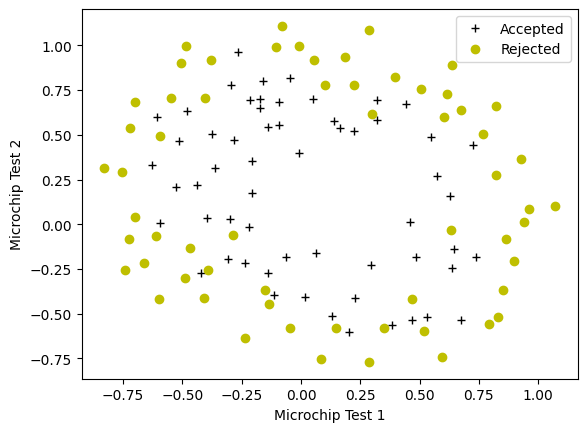

In [10]:
# Plot examples
plot_data(X_train, y_train, pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2')
# Set the x-axis label
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()

Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.


<a name="3.3"></a>
### 3.3 Feature mapping

One way to fit the data better is to create more features from each data point. In the provided function `map_feature`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\mathrm{map\_feature}(x) =
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 27-dimensional vector.

- A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will be nonlinear when drawn in our 2-dimensional plot.
- We have provided the `map_feature` function for you in utils.py.

In [11]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

mapped_X_jnp = jnp.array(mapped_X)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


Let's also print the first elements of `X_train` and `mapped_X` to see the tranformation.

In [12]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.

<a name="3.4"></a>
### 3.4 Cost function for regularized logistic regression

In this part, you will implement the cost function for regularized logistic regression.

Recall that for regularized logistic regression, the cost function is of the form
$$J(\mathbf{w}) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w}}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w}}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=1}^{n} w_j^2$$

Compare this to the cost function without regularization (which you implemented above), which is of the form

$$ J(\mathbf{w}) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ (-y^{(i)} \log\left(f_{\mathbf{w}}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w}}\left( \mathbf{x}^{(i)} \right) \right)\right]$$

The difference is the regularization term, which is $$\frac{\lambda}{2m}  \sum_{j=1}^{n} w_j^2$$
Note that the $w_o$ parameter is not regularized.

<a name='ex-03'></a>
### Exercise 3 Compute cost function

Please complete the `compute_cost_reg`

In [13]:
def compute_cost_reg_np(w, X, y, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n+1,))  values of parameters of the model including bias term
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost
    """

    m, n = X.shape

    # Añadir una columna de unos para el término independiente
    X_bias = np.hstack([np.ones((m, 1)), X])

    ### START CODE HERE ###
    # Compute the predictions
    predictions = sigmoid_np(np.dot(X_bias, w)) # Use the sigmoid function
    # Compute the cost of the predictions
    cost = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
    # Compute the cost without regularization
    cost_without_reg = np.sum(cost) / m
    # Compute the regularization cost
    reg_cost = (lambda_ / (2 * m)) * np.sum(w[1:]**2) # Regularization term

    ### END CODE HERE ###

    # Sumar el costo de regularización para obtener el costo total
    total_cost = cost_without_reg + reg_cost

    return total_cost



Run the cell below to check your implementation of the `compute_cost_reg` function.

Testing cost function in numpy

In [14]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]+1)-0.5
initial_w[-1]=0.5
initial_w = np.roll(initial_w , 1)
lambda_ = 0.5
cost = compute_cost_reg_np(initial_w, X_mapped, y_train, lambda_)

print("Regularized cost :", cost)


Regularized cost : 0.6618252552483951


**Expected Output**:
<table>
  <tr>
    <td> <b>Regularized cost : <b></td>
    <td> 0.6618252552483948 </td>
  </tr>
</table>

Implementing the cost function with JAX. The `compute_cost_reg` function is decorated with `@jit` to be compiled just-in-time for improved performance.


In [15]:
import jax.numpy as jnp
from jax import jit


@jit
def compute_cost_reg_jnp(w, X, y, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n+1,))  values of parameters of the model including bias term
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost
    """

    m, n = X.shape

    # Añadir una columna de unos para el término independiente
    X_bias = jnp.hstack([jnp.ones((m, 1)), X])

    ### START CODE HERE ###
    # Compute the predictions
    predictions = sigmoid_jnp(jnp.dot(X_bias, w))
    # Compute the cost of the predictions
    cost = -y * jnp.log(predictions) - (1 - y) * jnp.log(1 - predictions)
    # Compute the cost without regularization
    cost_without_reg = jnp.sum(cost) / m
    # Compute the regularization cost
    reg_cost = (lambda_ / (2 * m)) * jnp.sum(w[1:]**2)
    ### END CODE HERE ###

    # Sumar el costo de regularización para obtener el costo total
    total_cost = cost_without_reg + reg_cost

    return total_cost



In [16]:
np.random.seed(1)
X_mapped_jnp=jnp.array(X_mapped)
initial_w = np.random.rand(X_mapped.shape[1]+1)-0.5
initial_w[-1]=0.5
initial_w = np.roll(initial_w , 1)
initial_w_jnp = jnp.array(initial_w)
lambda_ = 0.5
cost = compute_cost_reg_jnp(initial_w_jnp, X_mapped_jnp, y_train_jnp, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.6618253


<a name="3.5"></a>
### 3.5 Gradient for regularized logistic regression

In this section, you will implement the gradient for regularized logistic regression.


The gradient of the regularized cost function is a vector where the $j^\mathrm{th}$ element is defined as follows:

$$ \frac{\partial J(\mathbf{w})}{\partial w_o} = \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)})  $$

$\frac{\partial J(\mathbf{w})}{\partial w_j} = \left( \frac{1}{m}  \sum_{i=0}^{m-1} (f_{\mathbf{w}}(\mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} w_j  \quad\$, $\mbox{\for j=1...(n)}$

Compare this to the gradient of the cost function without regularization (which you implemented above), which is of the form
$$
\frac{\partial J(\mathbf{w})}{\partial w_0}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w}}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)}) \tag{2}
$$
$$
\frac{\partial J(\mathbf{w})}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w}}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)} \tag{3}
$$


As you can see,$\frac{\partial J(\mathbf{w})}{\partial w_o}$ is the same, the difference is the following term in $\frac{\partial J(\mathbf{w})}{\partial w_j} \quad\forall j =1..n $, which is added $$\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=1...(n)$}$$


So

$$
\frac{\partial J(\mathbf{w})}{\partial w_j}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w}}(\mathbf{x}^{(i)}) - \mathbf{y}^{(i)})x_{j}^{(i)}+\frac{\lambda}{m} w_j  \quad\, \mbox{for $j=1...(n)$} \tag{3}
$$





<a name='ex-04'></a>
### Exercise 4 Compute gradient

Please complete the `compute_gradient_reg` function. Please consider that the regularization factor $\lambda$ does not apply for the bias term $w_o$. This is:

$\frac{\lambda}{m} w_j  \quad$, $\mbox{for $j=1...n$}$

Therefore, the coordinate of the regularization part of the gradient is zero.



In [17]:
def compute_gradient_reg_np(w, X, y, lambda_ = 1):
    """
    Computes the gradient of the cost function with respect to the parameters w
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n+1,))  values of parameters of the model including bias term
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      grad_w : (ndarray Shape (n+1,)) gradient of the cost with respect to the parameters w
    """
    m, n = X.shape # number of training examples, number of features

    # Añadir una columna de unos para el término independiente
    X_bias = np.hstack([np.ones((m, 1)), X]) 


    #START CODE HERE
    # Compute the predictions
    predictions = sigmoid_np(np.dot(X_bias, w))
    # Compute the errors between the predictions and the true values
    error = predictions - y
    # Compute the gradient without regularization
    grad_w_without_reg = np.dot(X_bias.T, error) / m
    # Compute the regularization term
    reg_term = (lambda_ / m) * w
    reg_term[0] = 0
   
    # Compute the gradient with regularization
    grad_w = grad_w_without_reg + reg_term
    #END CODE

    return grad_w



Run the cell below to check your implementation of the `compute_gradient_reg` function.

In [18]:
lambda_ = 0.5
dj_dw = compute_gradient_reg_np(initial_w, X_mapped, y_train, lambda_)


print(f"First few elements of regularized dj_dw:\n {dj_dw[:5].tolist()}", )



First few elements of regularized dj_dw:
 [0.07138288792343653, -0.0103860284505487, 0.011409852883280117, 0.0536273463274574, 0.003140278267313467]


**Expected Output**:
<table>
      <td> <b> First few elements of regularized dj_dw:</b> </td> </tr>
   <tr>
   <td> [0.07138288792343, -0.010386028450548, 0.011409852883280, 0.0536273463274, 0.003140278267313] </td>
  </tr>
</table>

Now we compute the gradient with JAX. You do not need to code this part

In [19]:
import jax.numpy as jnp
from jax import grad, jit
@jit
def compute_gradient_reg_jnp(w, X, y, lambda_ = 1):
    """
    Computes the gradient of the cost function with respect to the parameters w
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n+1,))  values of parameters of the model including bias term
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      grad_w : (ndarray Shape (n+1,)) gradient of the cost with respect to the parameters w
    """
    return grad(compute_cost_reg_jnp)(w, X, y, lambda_)

# Ejemplo de uso
# Supongamos que tenemos los siguientes datos:
w = jnp.array([0.5, -0.2, 0.3])  # pesos incluyendo el término independiente
X = jnp.array([[1, 2], [1, 3], [2, 3], [3, 4]])  # características
y = jnp.array([0, 1, 0, 1])  # etiquetas

# Calcular el costo con regularización
cost = compute_cost_reg_jnp(w, X, y, lambda_=1)
print(f"Cost: {cost}")

# Calcular el gradiente con regularización
grad_w = compute_gradient_reg_jnp(w, X, y, lambda_=1)
print(f"Gradient: {grad_w}")

Cost: 0.7925083637237549
Gradient: [0.24019825 0.248093   0.5554224 ]


In [20]:
lambda_ = 0.5
dj_dw = compute_gradient_reg_jnp(initial_w_jnp, X_mapped_jnp, y_train_jnp, lambda_)
print(f"First few elements of regularized dj_dw:\n {dj_dw[:5].tolist()}", )

First few elements of regularized dj_dw:
 [0.07138289511203766, -0.01038602739572525, 0.01140985544770956, 0.053627338260412216, 0.003140282118692994]


<a name="3.6"></a>
### 3.6 Learning parameters using gradient descent
 You will now find the optimal parameters of a logistic regression model by using gradient descent.
- You don't need to implement anything for this part. Simply run the cells below.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(\mathbf{w})$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly, your value of $J(\mathbf{w})$ should never increase, and should converge to a steady value by the end of the algorithm.

Similar to the previous parts, you will use your gradient descent function implemented above to learn the optimal parameters $w$,$b$.
- If you have completed the cost and gradient for regularized logistic regression correctly, you should be able to step through the next cell to learn the parameters $w$.
- After training our parameters, we will use it to plot the decision boundary.

**Note**

 You can reduce the `iterations` to test your implementation and iterate faster. If you have time later, run for 100,000 iterations to see better results.

In [21]:
def gradient_descent(X, y, w_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n+1,))  Initial values of parameters of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate (step length)
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n+1,)) Updated values of parameters of the model after
          running gradient descent

    """



    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw = gradient_function(w_in, X, y, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw


        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(w_in, X, y, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, cost, J_history, w_history #return w and J,w history for graphing

In [22]:
# Initialize fitting parameters
np.random.seed(1)

initial_w = np.random.rand(X_mapped.shape[1]+1)-0.5
initial_w[-1]=1
initial_w = np.roll(initial_w , 1)
# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01

# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,_, J_history,_ = gradient_descent(X_mapped, y_train, initial_w,
                                    compute_cost_reg_np, compute_gradient_reg_np,
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


<details>
<summary>
    <b>Expected Output: Cost < 0.5  (Click for details)</b>
</summary>

```
# Using the following settings
#np.random.seed(1)
#initial_w = np.random.rand(X_mapped.shape[1])-0.5
#initial_b = 1.
#lambda_ = 0.01;                                          
#iterations = 10000
#alpha = 0.01
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45       
    
```

JAX implementation of gradient descent

In [23]:
# Define the gradient descent function
def gradient_descent_jnp(X, y, w_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n)) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n+1,))  Initial values of parameters of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n+1,)) Updated values of parameters of the model after
          running gradient descent
    """
    def body_fun(i, val):
        w, J_history, w_history = val
        dj_dw = gradient_function(w, X, y, lambda_)
        w = w - alpha * dj_dw
        cost = cost_function(w, X, y, lambda_)
        J_history = J_history.at[i].set(cost)
        w_history = w_history.at[i].set(w)
        return w, J_history, w_history

    # Initial values
    J_history = jnp.zeros(num_iters)
    w_history = jnp.zeros((num_iters, w_in.shape[0]))
    w, J_history, w_history = jax.lax.fori_loop(0, num_iters, body_fun, (w_in, J_history, w_history))

    return w, J_history[-1], J_history, w_history


In [24]:
# Initialize fitting parameters
np.random.seed(1)

initial_w = np.random.rand(X_mapped.shape[1]+1)-0.5
initial_w[-1]=1
initial_w = np.roll(initial_w , 1)
initial_w_jnp = jnp.array(initial_w)

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.2

# Some gradient descent settings
iterations = 10000
alpha = 0.01
w_jnp,cost, J_history_jnp,_ = gradient_descent_jnp(X_mapped_jnp, y_train_jnp, initial_w_jnp,
                                    compute_cost_reg_jnp, compute_gradient_reg_jnp,
                                    alpha, iterations, lambda_)
w_jnp,cost, J_history_jnp

(Array([ 1.35189748e+00,  8.23012233e-01,  1.37658703e+00, -2.40671825e+00,
        -9.33920324e-01, -1.58161521e+00, -8.10673162e-02, -6.31353796e-01,
        -4.18128163e-01, -2.47077331e-01, -1.42300451e+00, -1.26403451e-01,
        -4.31043565e-01, -4.61401075e-01, -8.45840871e-01, -5.59143841e-01,
        -8.03220049e-02, -1.07514724e-01, -2.16187924e-01, -5.51643491e-01,
        -7.52758622e-01, -7.96103597e-01,  4.04291868e-01, -4.41325784e-01,
         1.72020406e-01,  1.86300138e-03,  2.28244439e-01, -1.32023203e+00],      dtype=float32),
 Array(0.46990708, dtype=float32),
 Array([0.72293365, 0.72227883, 0.7216279 , ..., 0.4699174 , 0.46991223,
        0.46990708], dtype=float32))

In [25]:
cost

Array(0.46990708, dtype=float32)

<a name="3.7"></a>
### 3.7 Plotting the decision boundary
To help you visualize the model learned by this classifier, we will use our `plot_decision_boundary` function which plots the (non-linear) decision boundary that separates the positive and negative examples.

- In the function, we plotted the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.

- After learning the parameters $w$, the next step is to plot a decision boundary similar to the next figure.

<img align="left" src="images/figure 4.png" width="450" height="450">
<!-- <img align="left" src="https://drive.google.com/uc?export=view&id=125G4B4atu8W28_MQOPUB7DEE8Zbga1-a" width="450" height="450"> -->


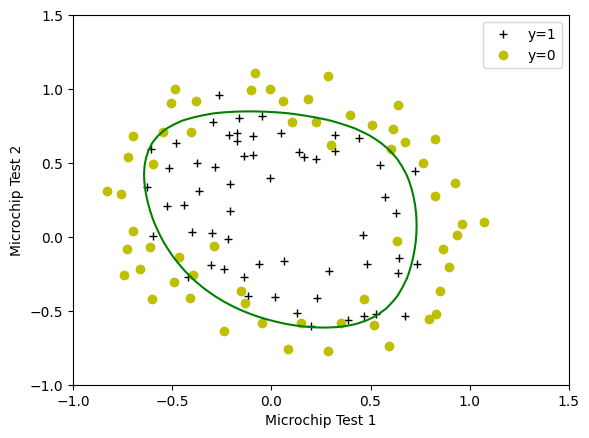

In [26]:
plot_decision_boundary(w[1:], w[0], X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Microchip Test 2')
# Set the x-axis label
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()

<a name="3.8"></a>
### 3.8 Evaluating regularized logistic regression model

You will use the `predict` function that you implemented above to calculate the accuracy of the regularized logistic regression model on the training set

In [27]:
#Compute accuracy on the training set
p = predict(X_mapped, w)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390


**Expected Output**:
<table>
  <tr>
    <td> <b>Train Accuracy:</b>~ 80%</td> </tr>
</table>

In [28]:
p_jnp = predict(np.array(X_mapped_jnp), np.array(w_jnp))

print('Train Accuracy: %f'%(np.mean(p_jnp == y_train_jnp) * 100))

Train Accuracy: 82.203384


<a name="4"></a>
## 4 Solution of logistic regression with Nelder-Mead method
This section show how to obtain the the solution with Nelder-Mead method.
You do not need to modify this section

In [29]:
from scipy.optimize import minimize
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]+1)-0.5
initial_w[-1]=1
initial_w = np.roll(initial_w , 1)
lambda_ =0.01
result_nelder = minimize(lambda t:  compute_cost_reg_np(t, X_mapped, y_train,lambda_), initial_w, method='Nelder-Mead')
optimal_nelder = result_nelder.fun
w_nelder = result_nelder.x
print("Optimal Value:", optimal_nelder)
print("Optimal Point:", w_nelder)

Optimal Value: 0.3406457677435589
Optimal Point: [ 3.84100143  1.85115261  4.62627187 -6.94651497 -6.17006175 -6.24750084
  2.42901608 -1.62755143  3.33402053 -1.86139339  0.10030129  0.23079715
 -3.1423276   1.69883717 -5.78448168 -1.99098383 -1.04190232 -0.91112377
  0.04547169 -2.65270116  0.50346239 -6.99884013  1.36878568 -1.18787425
  5.91669644 -4.99612795 -9.08472273  1.61380506]


Nelder-med precision

In [30]:
#Compute accuracy on the training set
p = predict(X_mapped, w_nelder)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 84.745763


<a name="5"></a>
## 5 Testing a subset of the dataset
This section shows how to test a subset of the original data set with the three methods:
- Gradient descent with numpy
- Gradient descent with jax (automatic differentiation)
- Nelder-Med

Getting a permutation

In [31]:
m, n= X_mapped.shape
s=round(0.8*m)
permuted_indices = np.random.permutation(m)
X_mapped_test = X_mapped[permuted_indices[:s],:]
y_train_test = y_train[permuted_indices[:s]]
X_mapped_jnp_test = jnp.array(X_mapped_test)
y_train_jnp_test = jnp.array(y_train_test)

Testing and comparing results

In [32]:
#Nelder
result_nelder = minimize(lambda t:  compute_cost_reg_np(t, X_mapped_test, y_train_test,lambda_), initial_w, method='Nelder-Mead')
print(f"Optimal Value: {result_nelder.fun}, Optimal Point: {result_nelder.x}")
p=predict(X_mapped_test,result_nelder.x)
print('Train Accuracy: %f'%(np.mean(p == y_train_test) * 100))

Optimal Value: 0.3529708054868657, Optimal Point: [  3.20512646  -0.90005259   3.94697816  -7.0710876   -1.30377694
  -2.7462091    8.11299062  -2.32524338   2.14455596  -0.67374991
  -0.57825009  -0.02979911   0.88138013  -8.06945158 -10.33075566
  -2.85933901  -3.03044893   2.31477101  -0.88087103  -2.49012819
   0.40520084  -5.39548482  -2.85045373   0.10214013   3.65764077
   1.93642394   0.98935098  -0.83739728]
Train Accuracy: 82.978723


In [33]:
# Initialize fitting parameters
np.random.seed(1)

initial_w = np.random.rand(X_mapped.shape[1]+1)-0.5
initial_w[-1]=1
initial_w = np.roll(initial_w , 1)
initial_w_jnp = jnp.array(initial_w)

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01

# Some gradient descent settings
iterations = 10000
alpha = 0.01
w, cost, J_history, w_= gradient_descent(X_mapped_test, y_train_test, initial_w,
                                    compute_cost_reg_np, compute_gradient_reg_np,
                                    alpha, iterations, lambda_)
print(f"Optimal Value: {cost}, Optimal Point: {w}")
p=predict(X_mapped_test,w)
print('Train Accuracy: %f'%(np.mean(p == y_train_test) * 100))

Iteration    0: Cost     0.74   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.55   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.49   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.46   
Iteration 8000: Cost     0.45   
Iteration 9000: Cost     0.44   
Iteration 9999: Cost     0.43   
Optimal Value: 0.4341405220108231, Optimal Point: [ 1.43257741  0.91842041  1.48545658 -2.44014857 -1.14232922 -1.97826522
  0.12835581 -0.84274019 -0.44293957 -0.27673886 -1.34705638 -0.23323573
 -0.46933136 -0.47345614 -1.09215357 -0.48403874 -0.1438371  -0.08056716
 -0.26864089 -0.59794202 -0.88553501 -0.7031454   0.37932786 -0.46341165
  0.20186531 -0.01296897  0.35586382 -1.62550751]
Train Accuracy: 82.978723


In [34]:
w, cost, J_history, w_= gradient_descent_jnp(X_mapped_jnp_test, y_train_jnp_test, initial_w_jnp,
                                    compute_cost_reg_jnp, compute_gradient_reg_jnp,
                                    alpha, iterations, lambda_)
print(f"Optimal Value: {cost}, Optimal Point: {w}")
p=predict(X_mapped_test,np.array(w))
print('Train Accuracy: %f'%(np.mean(p == y_train_test) * 100))

Optimal Value: 0.43414047360420227, Optimal Point: [ 1.4325774   0.9184201   1.4854577  -2.4401503  -1.1423289  -1.9782646
  0.12835646 -0.8427395  -0.44294098 -0.276742   -1.3470554  -0.23323564
 -0.46933153 -0.4734583  -1.0921537  -0.48403797 -0.14383693 -0.08056703
 -0.26864073 -0.5979394  -0.88553375 -0.7031447   0.37932843 -0.46341118
  0.201864   -0.01296861  0.35586464 -1.625508  ]
Train Accuracy: 82.978723


<a name="6"></a>
## 6 Task
- Complete the exercises 1 to 4
- Search a good $\alpha$ (step length) for gradient descent considering a lambda of 0.1 for Grandient Descent. For Nelder you need search best $\lambda$ 
- Run 10 times each method comparing, objective function value, running time and training accuracy. Do not foget to use statistical test

### Busqueda y seleccion de hipermarametros lambda - NELDER METHOD

In [35]:
# Range for test lambda and alpha parameters
lambda_range = (-3, 1);

#Lista con valores de Lambda con una escala logaritmica
lambdas = [i for i in np.logspace(lambda_range[0], lambda_range[1], num=5) ]
lambdas

[0.001, 0.01, 0.1, 1.0, 10.0]

In [36]:
# #Permutamos el dataset para dividir los valores de entrenamiento y los valores de prueba.
m, n= X_mapped.shape
s=round(0.8*m)
permuted_indices = np.random.permutation(m)
X_mapped_test = X_mapped[permuted_indices[:s],:]
y_train_test = y_train[permuted_indices[:s]]
X_mapped_jnp_test = jnp.array(X_mapped_test)
y_train_jnp_test = jnp.array(y_train_test)

In [37]:
results = {};
for lambda_ in lambdas:
    result_nelder = minimize(lambda t:  compute_cost_reg_np(t, X_mapped_test, y_train_test,lambda_), initial_w, method='Nelder-Mead')
    p=predict(X_mapped_test,result_nelder.x)
    #results[f"Optimal_Value_lamba_{lambda_}"] = result_nelder.fun;
    #results[f'Optimal_Point_lamba_{lambda_}'] = result_nelder.x;
    results[f"Train_Accuracy_lamba_{lambda_}"] = np.mean(p == y_train_test) * 100;

results

{'Train_Accuracy_lamba_0.001': 88.29787234042553,
 'Train_Accuracy_lamba_0.01': 82.97872340425532,
 'Train_Accuracy_lamba_0.1': 82.97872340425532,
 'Train_Accuracy_lamba_1.0': 84.04255319148936,
 'Train_Accuracy_lamba_10.0': 60.63829787234043}

Ya que en nuestra busqueda de valores para el hiperparametro de lambda encontramos que un valor frontera es el mas adecuada, buscaremos valores menores con el objetivo de ver si podemos mejorar el entrenamiento del modelo

In [38]:
#Repetimos la busqueda para el valor frontera 0.001
lambda_range = (-5, -3);
lambdas = [i for i in np.logspace(lambda_range[0], lambda_range[1], num=5) ]
lambdas

[1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001]

In [39]:
#Obtenemos los resultados para cada valor dentro de la frontera
results = {};
for lambda_ in lambdas:
    result_nelder = minimize(lambda t:  compute_cost_reg_np(t, X_mapped_test, y_train_test,lambda_), initial_w, method='Nelder-Mead')
    p=predict(X_mapped_test,result_nelder.x)
    #results[f"Optimal_Value_lamba_{lambda_}"] = result_nelder.fun;
    #results[f'Optimal_Point_lamba_{lambda_}'] = result_nelder.x;
    results[f"Train_Accuracy_lamba_{lambda_}"] = np.mean(p == y_train_test) * 100;

results

{'Train_Accuracy_lamba_1e-05': 84.04255319148936,
 'Train_Accuracy_lamba_3.1622776601683795e-05': 85.1063829787234,
 'Train_Accuracy_lamba_0.0001': 84.04255319148936,
 'Train_Accuracy_lamba_0.00031622776601683794': 84.04255319148936,
 'Train_Accuracy_lamba_0.001': 88.29787234042553}

In [40]:
#Funtion for permute the dataset
def permuted_dataset():
    m, n= X_mapped.shape
    s=round(0.8*m)
    permuted_indices = np.random.permutation(m)
    X_mapped_test = X_mapped[permuted_indices[:s],:]
    y_train_test = y_train[permuted_indices[:s]]
    X_mapped_jnp_test = jnp.array(X_mapped_test)
    y_train_jnp_test = jnp.array(y_train_test)

    return X_mapped_test, y_train_test, X_mapped_jnp_test, y_train_jnp_test


In [41]:
def inicialization_w():
    # Initialize fitting parameters
    np.random.seed(1) # For reproducibility
    initial_w = np.random.rand(X_mapped.shape[1]+1)-0.5 # Random initialization
    initial_w[-1]=1 # Set the bias term
    initial_w = np.roll(initial_w , 1) # Roll the bias term to the first position
    initial_w_jnp = jnp.array(initial_w) # Convert to jnp array
    return initial_w, initial_w_jnp

Ya que el modelo parece tener un mejor exactitud con el valor de lambda 0.001, usaremos ese valor para realizar nuestras pruebas.

In [42]:
initial_w, initial_w_jnp = inicialization_w();

In [43]:
#Seleccionaremos a lamba 0.001, ya que tiene un mejor valor en el train accuracy
results_nelder_method ={};
lambda_ = 0.001

for i in range(1, 11):
    
    X_mapped_test, y_train_test, X_mapped_jnp_test, y_train_jnp_test = permuted_dataset()
    start_time = time.time()
    result_nelder = minimize(lambda t:  compute_cost_reg_np(t, X_mapped_test, y_train_test,lambda_), initial_w, method='Nelder-Mead')
    p=predict(X_mapped_test,result_nelder.x)
    end_time = time.time()
    execution_time = end_time - start_time

    results_nelder_method[f"Optimal_Value_iteration_{i}"] = result_nelder.fun;
    #results_nelder_method[f"Optimal_Point_iteration_'{i}'"] = result_nelder.x;
    results_nelder_method[f"Train_Accuracy_iteration_{i}"] = np.mean(p == y_train_test) * 100;
    results_nelder_method[f"Total_Exc_time_iteration_{i}"] = np.round(execution_time, 4);
    

    

In [44]:
results_nelder_method

{'Optimal_Value_iteration_1': 0.3223365431990101,
 'Train_Accuracy_iteration_1': 88.29787234042553,
 'Total_Exc_time_iteration_1': 0.3462,
 'Optimal_Value_iteration_2': 0.30343593070851227,
 'Train_Accuracy_iteration_2': 85.1063829787234,
 'Total_Exc_time_iteration_2': 0.3776,
 'Optimal_Value_iteration_3': 0.3117293134299829,
 'Train_Accuracy_iteration_3': 86.17021276595744,
 'Total_Exc_time_iteration_3': 0.3669,
 'Optimal_Value_iteration_4': 0.35015798989787833,
 'Train_Accuracy_iteration_4': 85.1063829787234,
 'Total_Exc_time_iteration_4': 0.362,
 'Optimal_Value_iteration_5': 0.32276424191542635,
 'Train_Accuracy_iteration_5': 86.17021276595744,
 'Total_Exc_time_iteration_5': 0.3417,
 'Optimal_Value_iteration_6': 0.2579280199911556,
 'Train_Accuracy_iteration_6': 89.36170212765957,
 'Total_Exc_time_iteration_6': 0.342,
 'Optimal_Value_iteration_7': 0.3379563860935135,
 'Train_Accuracy_iteration_7': 84.04255319148936,
 'Total_Exc_time_iteration_7': 0.3482,
 'Optimal_Value_iteration_8'

### GRADIENT DESCENT

#### Buscamos el mejor valor para el hiperparametro de alpha.

In [45]:
range_alpha = (-3, 1);
# lista con valores alpha con una escala logaritmica
alphas = [i for i in np.logspace(range_alpha[0], range_alpha[1], num=5)]
alphas

[0.001, 0.01, 0.1, 1.0, 10.0]

In [46]:
X_mapped_test, y_train_test, X_mapped_jnp_test, y_train_jnp_test = permuted_dataset()
results_apha = {};
lambda_ = 0.1
iterations = 10000

#J_histories = [];
for alpha in alphas:
    w, cost, J_history, w_= gradient_descent(X_mapped_test, y_train_test, initial_w,
                                        compute_cost_reg_np, compute_gradient_reg_np,
                                        alpha, iterations, lambda_)
    p=predict(X_mapped_test,w)
    results_apha[f"Optimal_Value_alpha_{alpha}"] = cost;
    #results[f'Optimal_Point_alpha_{alpha}'] = w;
    results_apha[f"Train_Accuracy_alpha_{alpha}"] = np.mean(p == y_train_test) * 100;
    #J_histories.append(J_history) # Save the cost history for plotting


Iteration    0: Cost     0.73   
Iteration 1000: Cost     0.68   
Iteration 2000: Cost     0.66   
Iteration 3000: Cost     0.64   
Iteration 4000: Cost     0.63   
Iteration 5000: Cost     0.62   
Iteration 6000: Cost     0.61   
Iteration 7000: Cost     0.61   
Iteration 8000: Cost     0.60   
Iteration 9000: Cost     0.60   
Iteration 9999: Cost     0.60   
Iteration    0: Cost     0.73   
Iteration 1000: Cost     0.60   
Iteration 2000: Cost     0.57   
Iteration 3000: Cost     0.54   
Iteration 4000: Cost     0.53   
Iteration 5000: Cost     0.51   
Iteration 6000: Cost     0.50   
Iteration 7000: Cost     0.49   
Iteration 8000: Cost     0.48   
Iteration 9000: Cost     0.47   
Iteration 9999: Cost     0.47   
Iteration    0: Cost     0.73   
Iteration 1000: Cost     0.47   
Iteration 2000: Cost     0.43   
Iteration 3000: Cost     0.42   
Iteration 4000: Cost     0.42   
Iteration 5000: Cost     0.41   
Iteration 6000: Cost     0.41   
Iteration 7000: Cost     0.41   
Iteration 

In [47]:
results_apha

{'Optimal_Value_alpha_0.001': 0.5962402819936766,
 'Train_Accuracy_alpha_0.001': 69.14893617021278,
 'Optimal_Value_alpha_0.01': 0.4682725155682113,
 'Train_Accuracy_alpha_0.01': 81.91489361702128,
 'Optimal_Value_alpha_0.1': 0.4100412010375886,
 'Train_Accuracy_alpha_0.1': 84.04255319148936,
 'Optimal_Value_alpha_1.0': 0.40961125156704525,
 'Train_Accuracy_alpha_1.0': 84.04255319148936,
 'Optimal_Value_alpha_10.0': 0.4096112515664841,
 'Train_Accuracy_alpha_10.0': 84.04255319148936}

In [48]:
# plt.figure(figsize=(12, 8))
# for i, alpha in enumerate(alphas):
#     plt.plot(J_histories[i], label=f'alpha={alpha}')

# plt.xlabel('Iteraciones')
# plt.ylabel('Coste')
# plt.title('Convergencia del Coste para diferentes valores de alpha')
# plt.legend()
# plt.show()

Ya que el modelo no parece mejorar a partir de alpha =  0.1. Usaremos este valor.

In [49]:
#Gradient Descent with NUMPY
results_grad_np ={};
lambda_ = 0.1
alpha = 0.1
iterations = 10000

for i in range(1, 11):
    
    X_mapped_test, y_train_test, X_mapped_jnp_test, y_train_jnp_test = permuted_dataset()
    start_time = time.time()
    w, cost, J_history, w_= gradient_descent(X_mapped_test, y_train_test, initial_w,
                                        compute_cost_reg_np, compute_gradient_reg_np,
                                        alpha, iterations, lambda_)
    p=predict(X_mapped_test,w)
    end_time = time.time()
    results_grad_np[f"Optimal_Value_iteration_{i}"] = cost;
    #results[f'Optimal_Point_alpha_{alpha}'] = w;
    results_grad_np[f"Train_Accuracy_iteration_{i}"] = np.mean(p == y_train_test) * 100;
    results_grad_np[f"Total_Exc_time_iteration_{i}"] = np.round(execution_time, 4)


Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.46   
Iteration 2000: Cost     0.42   
Iteration 3000: Cost     0.41   
Iteration 4000: Cost     0.40   
Iteration 5000: Cost     0.40   
Iteration 6000: Cost     0.40   
Iteration 7000: Cost     0.40   
Iteration 8000: Cost     0.40   
Iteration 9000: Cost     0.40   
Iteration 9999: Cost     0.40   
Iteration    0: Cost     0.75   
Iteration 1000: Cost     0.49   
Iteration 2000: Cost     0.46   
Iteration 3000: Cost     0.45   
Iteration 4000: Cost     0.44   
Iteration 5000: Cost     0.44   
Iteration 6000: Cost     0.44   
Iteration 7000: Cost     0.44   
Iteration 8000: Cost     0.44   
Iteration 9000: Cost     0.44   
Iteration 9999: Cost     0.44   
Iteration    0: Cost     0.71   
Iteration 1000: Cost     0.47   
Iteration 2000: Cost     0.44   
Iteration 3000: Cost     0.42   
Iteration 4000: Cost     0.42   
Iteration 5000: Cost     0.41   
Iteration 6000: Cost     0.41   
Iteration 7000: Cost     0.41   
Iteration 

In [50]:
results_grad_np

{'Optimal_Value_iteration_1': 0.3986778875419503,
 'Train_Accuracy_iteration_1': 82.97872340425532,
 'Total_Exc_time_iteration_1': 0.3345,
 'Optimal_Value_iteration_2': 0.4373163066002201,
 'Train_Accuracy_iteration_2': 80.85106382978722,
 'Total_Exc_time_iteration_2': 0.3345,
 'Optimal_Value_iteration_3': 0.40957053512909014,
 'Train_Accuracy_iteration_3': 82.97872340425532,
 'Total_Exc_time_iteration_3': 0.3345,
 'Optimal_Value_iteration_4': 0.40085068774241744,
 'Train_Accuracy_iteration_4': 85.1063829787234,
 'Total_Exc_time_iteration_4': 0.3345,
 'Optimal_Value_iteration_5': 0.38843610803186635,
 'Train_Accuracy_iteration_5': 86.17021276595744,
 'Total_Exc_time_iteration_5': 0.3345,
 'Optimal_Value_iteration_6': 0.4156464511705607,
 'Train_Accuracy_iteration_6': 82.97872340425532,
 'Total_Exc_time_iteration_6': 0.3345,
 'Optimal_Value_iteration_7': 0.422744388754613,
 'Train_Accuracy_iteration_7': 84.04255319148936,
 'Total_Exc_time_iteration_7': 0.3345,
 'Optimal_Value_iteration_

In [51]:
#Gradient Descent With JNP
results_grad_jnp ={};
lambda_ = 0.01
alpha = 0.1
iterations = 10000

for i in range(1, 11):
    
    X_mapped_test, y_train_test, X_mapped_jnp_test, y_train_jnp_test = permuted_dataset()
    #Usaremos el mismo alpha para comparar el gradient_des_jpn
    start_time = time.time()
    w, cost, J_history, w_= gradient_descent_jnp(X_mapped_jnp_test, y_train_jnp_test, initial_w_jnp,
                                        compute_cost_reg_jnp, compute_gradient_reg_jnp,
                                        alpha, iterations, lambda_)
    p=predict(X_mapped_test,np.array(w))
    end_time = time.time()
    results_grad_jnp[f"Optimal_Value_iteration_{i}"] = round(cost.item(), 16)
    #results_grad_jnp[f'Optimal_Point_alpha_{alpha}'] = w;
    results_grad_jnp[f"Train_Accuracy_iteration_{i}"] = np.mean(p == y_train_test) * 100;
    results_grad_jnp[f"Total_Exc_time_iteration_{i}"] = np.round(execution_time, 4)


In [52]:
results_grad_jnp

{'Optimal_Value_iteration_1': 0.3463490605354309,
 'Train_Accuracy_iteration_1': 82.97872340425532,
 'Total_Exc_time_iteration_1': 0.3345,
 'Optimal_Value_iteration_2': 0.3500458598136902,
 'Train_Accuracy_iteration_2': 85.1063829787234,
 'Total_Exc_time_iteration_2': 0.3345,
 'Optimal_Value_iteration_3': 0.329811692237854,
 'Train_Accuracy_iteration_3': 87.2340425531915,
 'Total_Exc_time_iteration_3': 0.3345,
 'Optimal_Value_iteration_4': 0.3478964269161224,
 'Train_Accuracy_iteration_4': 84.04255319148936,
 'Total_Exc_time_iteration_4': 0.3345,
 'Optimal_Value_iteration_5': 0.3347339034080505,
 'Train_Accuracy_iteration_5': 84.04255319148936,
 'Total_Exc_time_iteration_5': 0.3345,
 'Optimal_Value_iteration_6': 0.3559886813163757,
 'Train_Accuracy_iteration_6': 84.04255319148936,
 'Total_Exc_time_iteration_6': 0.3345,
 'Optimal_Value_iteration_7': 0.3580703139305115,
 'Train_Accuracy_iteration_7': 80.85106382978722,
 'Total_Exc_time_iteration_7': 0.3345,
 'Optimal_Value_iteration_8': 

## Pruebas Estadisticas

In [53]:
results_grad_np, results_grad_jnp, results_nelder_method

({'Optimal_Value_iteration_1': 0.3986778875419503,
  'Train_Accuracy_iteration_1': 82.97872340425532,
  'Total_Exc_time_iteration_1': 0.3345,
  'Optimal_Value_iteration_2': 0.4373163066002201,
  'Train_Accuracy_iteration_2': 80.85106382978722,
  'Total_Exc_time_iteration_2': 0.3345,
  'Optimal_Value_iteration_3': 0.40957053512909014,
  'Train_Accuracy_iteration_3': 82.97872340425532,
  'Total_Exc_time_iteration_3': 0.3345,
  'Optimal_Value_iteration_4': 0.40085068774241744,
  'Train_Accuracy_iteration_4': 85.1063829787234,
  'Total_Exc_time_iteration_4': 0.3345,
  'Optimal_Value_iteration_5': 0.38843610803186635,
  'Train_Accuracy_iteration_5': 86.17021276595744,
  'Total_Exc_time_iteration_5': 0.3345,
  'Optimal_Value_iteration_6': 0.4156464511705607,
  'Train_Accuracy_iteration_6': 82.97872340425532,
  'Total_Exc_time_iteration_6': 0.3345,
  'Optimal_Value_iteration_7': 0.422744388754613,
  'Train_Accuracy_iteration_7': 84.04255319148936,
  'Total_Exc_time_iteration_7': 0.3345,
  'Op

In [54]:
# Extraer los valores de cada métrica
train_accuracy_np = [results_grad_np[f"Train_Accuracy_iteration_{i}"] for i in range(1, 11)]
train_accuracy_jnp = [results_grad_jnp[f"Train_Accuracy_iteration_{i}"] for i in range(1, 11)]
train_accuracy_nelder = [results_nelder_method[f"Train_Accuracy_iteration_{i}"] for i in range(1, 11)]

optimal_value_np = [results_grad_np[f"Optimal_Value_iteration_{i}"] for i in range(1, 11)]
optimal_value_jnp = [results_grad_jnp[f"Optimal_Value_iteration_{i}"] for i in range(1, 11)]
optimal_value_nelder = [results_nelder_method[f"Optimal_Value_iteration_{i}"] for i in range(1, 11)]

total_exc_time_np = [results_grad_np[f"Total_Exc_time_iteration_{i}"] for i in range(1, 11)]
total_exc_time_jnp = [results_grad_jnp[f"Total_Exc_time_iteration_{i}"] for i in range(1, 11)]
total_exc_time_nelder = [results_nelder_method[f"Total_Exc_time_iteration_{i}"] for i in range(1, 11)]

In [55]:
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

In [56]:
# Verificar normalidad
def check_normality(data, label):
    shapiro_stat, shapiro_p = stats.shapiro(data)
    ad_stat, ad_crit_values, ad_significance_levels = stats.anderson(data, dist='norm')

    print(f'Prueba de Shapiro-Wilk para {label}:')
    print(f'Estadístico={shapiro_stat:.3f}, p-valor={shapiro_p:.3f}')
    if shapiro_p > 0.05:
        print('Los datos parecen seguir una distribución normal (no se rechaza H0)')
    else:
        print('Los datos no parecen seguir una distribución normal (se rechaza H0)')

    print(f'\nPrueba de Anderson-Darling para {label}:')
    print(f'Estadístico: {ad_stat:.3f}')
    for cv, sl in zip(ad_crit_values, ad_significance_levels):
        if ad_stat < cv:
            print(f'A nivel de significancia {sl}%: {cv} (no se rechaza H0)')
        else:
            print(f'A nivel de significancia {sl}%: {cv} (se rechaza H0)')
    print()

check_normality(train_accuracy_np, "Train Accuracy (GD NP)")
check_normality(total_exc_time_np, "Total Execution Time (GD NP)")
check_normality(optimal_value_np, "Optimal Value (GD NP)")

check_normality(train_accuracy_jnp, "Train Accuracy (GD JNP)")
check_normality(total_exc_time_jnp, "Total Execution Time (GD JNP)")
check_normality(optimal_value_jnp, "Optimal Value (GD JNP)")

check_normality(train_accuracy_nelder, "Train Accuracy (Nelder-Mead)")
check_normality(total_exc_time_nelder, "Total Execution Time (Nelder-Mead)")
check_normality(optimal_value_nelder, "Optimal Value (Nelder-Mead)")

Prueba de Shapiro-Wilk para Train Accuracy (GD NP):
Estadístico=0.894, p-valor=0.190
Los datos parecen seguir una distribución normal (no se rechaza H0)

Prueba de Anderson-Darling para Train Accuracy (GD NP):
Estadístico: 0.450
A nivel de significancia 15.0%: 0.501 (no se rechaza H0)
A nivel de significancia 10.0%: 0.57 (no se rechaza H0)
A nivel de significancia 5.0%: 0.684 (no se rechaza H0)
A nivel de significancia 2.5%: 0.798 (no se rechaza H0)
A nivel de significancia 1.0%: 0.95 (no se rechaza H0)

Prueba de Shapiro-Wilk para Total Execution Time (GD NP):
Estadístico=1.000, p-valor=1.000
Los datos parecen seguir una distribución normal (no se rechaza H0)

Prueba de Anderson-Darling para Total Execution Time (GD NP):
Estadístico: 9.518
A nivel de significancia 15.0%: 0.501 (se rechaza H0)
A nivel de significancia 10.0%: 0.57 (se rechaza H0)
A nivel de significancia 5.0%: 0.684 (se rechaza H0)
A nivel de significancia 2.5%: 0.798 (se rechaza H0)
A nivel de significancia 1.0%: 0.95 

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [57]:
# Prueba de Kruskal-Wallis
def perform_kruskal(data1, data2, data3, label):
    h_val, p_val = stats.kruskal(data1, data2, data3)
    print(f'Prueba de Kruskal-Wallis para {label}:')
    print(f'Estadístico H={h_val:.3f}, p-valor={p_val:.3f}')
    if p_val > 0.05:
        print('No hay diferencia significativa entre los métodos (no se rechaza H0)')
    else:
        print('Hay una diferencia significativa entre los métodos (se rechaza H0)')
    print()

# Aplicar Kruskal-Wallis
perform_kruskal(train_accuracy_np, train_accuracy_jnp, train_accuracy_nelder, "Train Accuracy")
perform_kruskal(total_exc_time_np, total_exc_time_jnp, total_exc_time_nelder, "Total Execution Time")
perform_kruskal(optimal_value_np, optimal_value_jnp, optimal_value_nelder, "Optimal Value")

Prueba de Kruskal-Wallis para Train Accuracy:
Estadístico H=9.324, p-valor=0.009
Hay una diferencia significativa entre los métodos (se rechaza H0)

Prueba de Kruskal-Wallis para Total Execution Time:
Estadístico H=23.848, p-valor=0.000
Hay una diferencia significativa entre los métodos (se rechaza H0)

Prueba de Kruskal-Wallis para Optimal Value:
Estadístico H=21.997, p-valor=0.000
Hay una diferencia significativa entre los métodos (se rechaza H0)



In [58]:
import pandas as pd


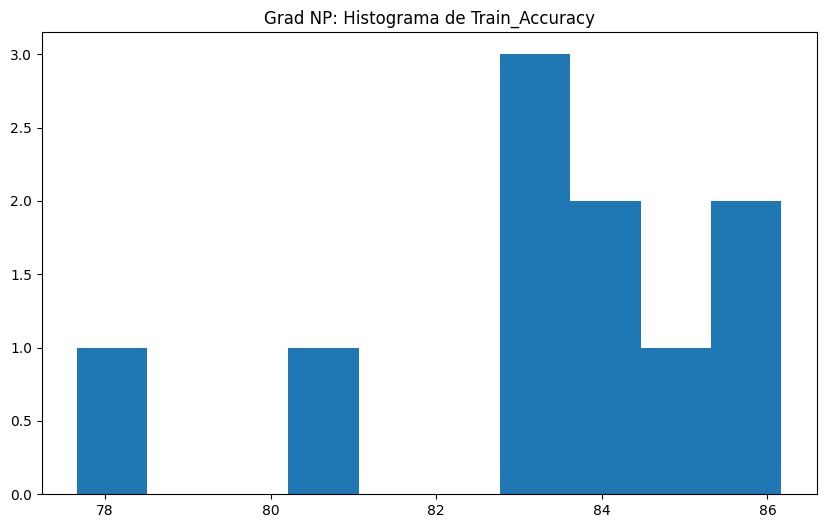

Grad NP: Test Shapiro-Wilk para Train_Accuracy:
ShapiroResult(statistic=0.8943619784325042, pvalue=0.18977834603833832)
Grad NP: Test Kolmogorov-Smirnov para Train_Accuracy:
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=77.6595744680851, statistic_sign=-1)


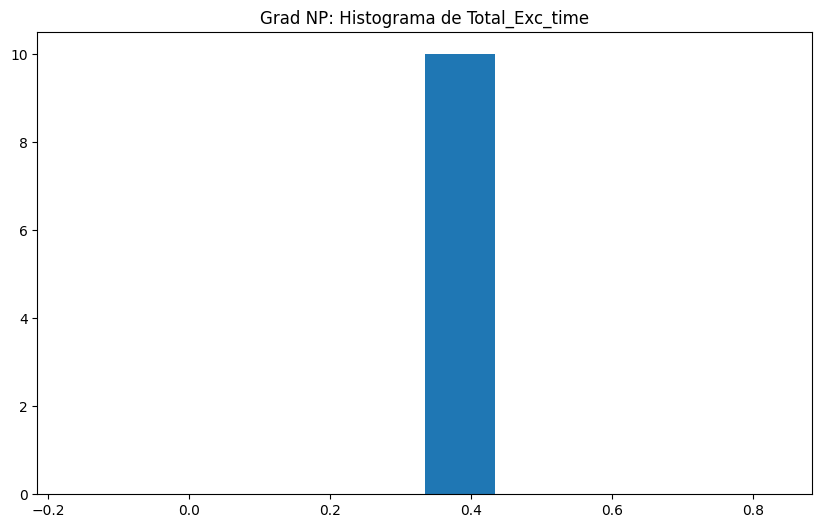

Grad NP: Test Shapiro-Wilk para Total_Exc_time:
ShapiroResult(statistic=1.0, pvalue=1.0)
Grad NP: Test Kolmogorov-Smirnov para Total_Exc_time:
KstestResult(statistic=0.630998854551708, pvalue=0.00021906626647021682, statistic_location=0.3345, statistic_sign=-1)


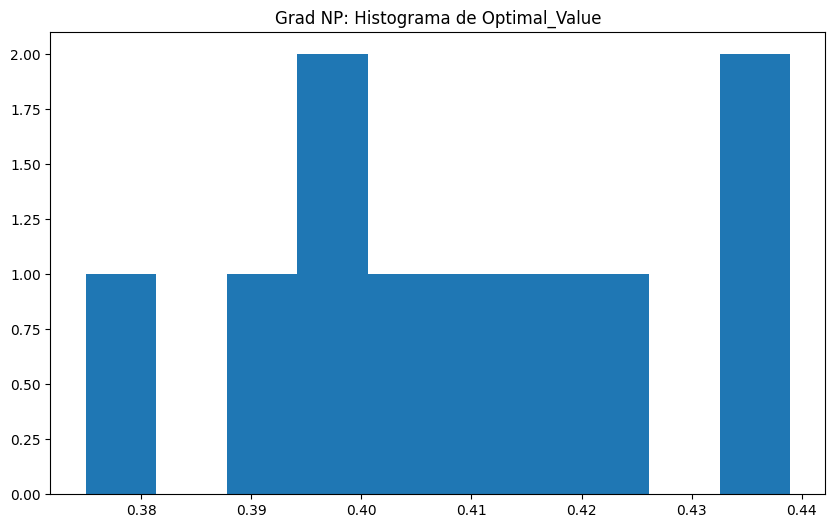

Grad NP: Test Shapiro-Wilk para Optimal_Value:
ShapiroResult(statistic=0.9618067661299663, pvalue=0.8062629141959673)
Grad NP: Test Kolmogorov-Smirnov para Optimal_Value:
KstestResult(statistic=0.64614944849336, pvalue=0.00013374573609620407, statistic_location=0.3749453605139426, statistic_sign=-1)


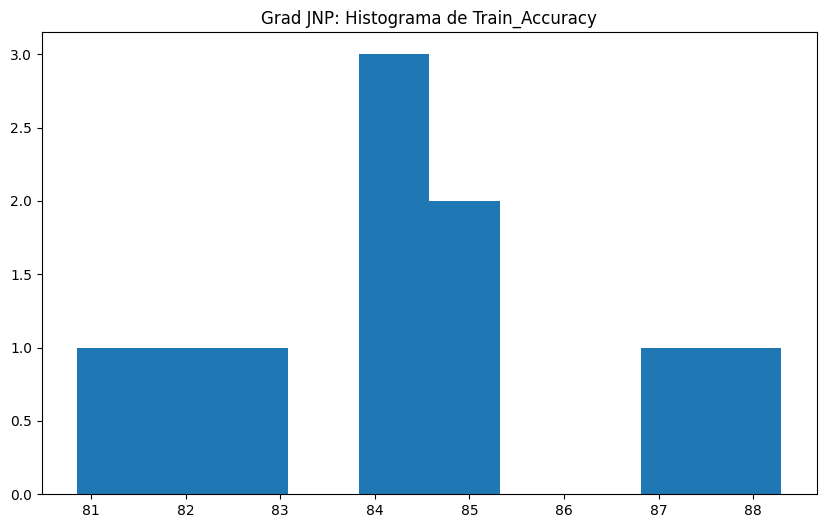

Grad JNP: Test Shapiro-Wilk para Train_Accuracy:
ShapiroResult(statistic=0.9624237190864553, pvalue=0.8131173030252168)
Grad JNP: Test Kolmogorov-Smirnov para Train_Accuracy:
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=80.85106382978722, statistic_sign=-1)


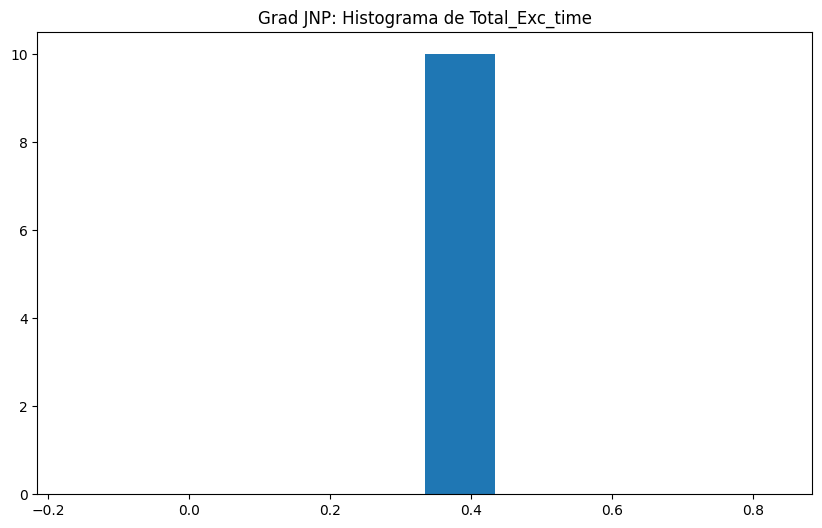

Grad JNP: Test Shapiro-Wilk para Total_Exc_time:
ShapiroResult(statistic=1.0, pvalue=1.0)
Grad JNP: Test Kolmogorov-Smirnov para Total_Exc_time:
KstestResult(statistic=0.630998854551708, pvalue=0.00021906626647021682, statistic_location=0.3345, statistic_sign=-1)


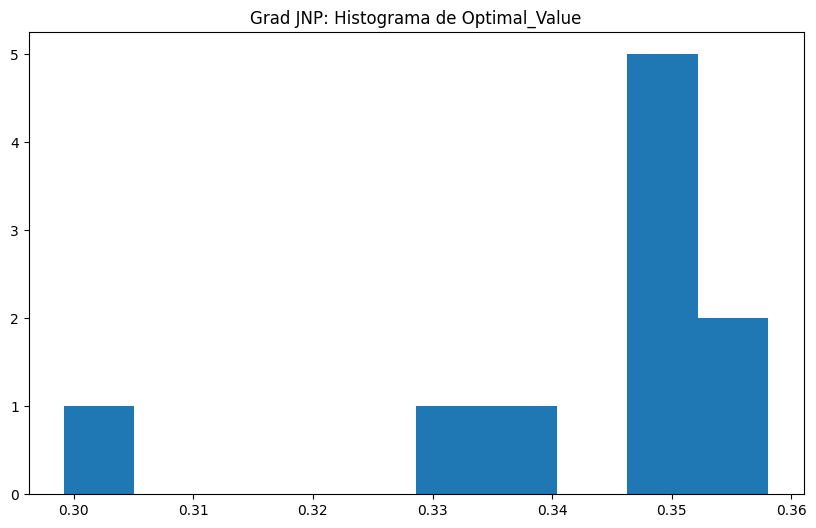

Grad JNP: Test Shapiro-Wilk para Optimal_Value:
ShapiroResult(statistic=0.7890185968429687, pvalue=0.010660173045737588)
Grad JNP: Test Kolmogorov-Smirnov para Optimal_Value:
KstestResult(statistic=0.617598509706245, pvalue=0.0003337344625714787, statistic_location=0.2991796433925629, statistic_sign=-1)


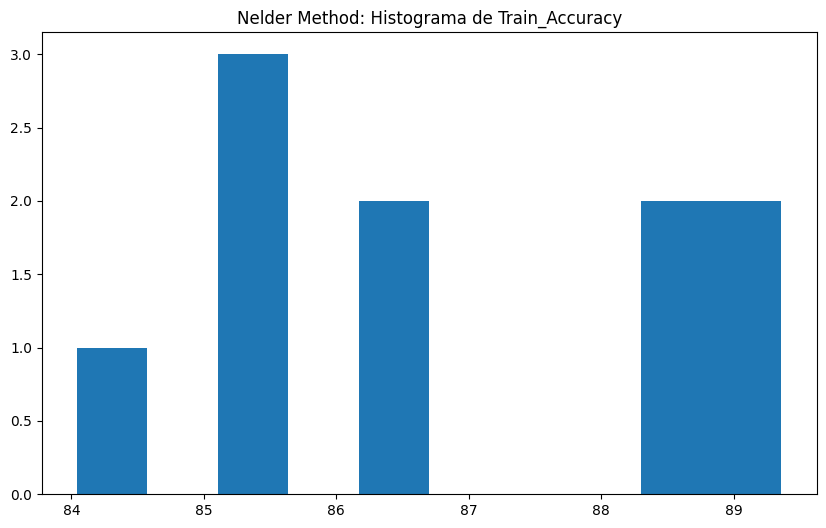

Nelder Method: Test Shapiro-Wilk para Train_Accuracy:
ShapiroResult(statistic=0.8851505763472399, pvalue=0.14944000329988982)
Nelder Method: Test Kolmogorov-Smirnov para Train_Accuracy:
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=84.04255319148936, statistic_sign=-1)


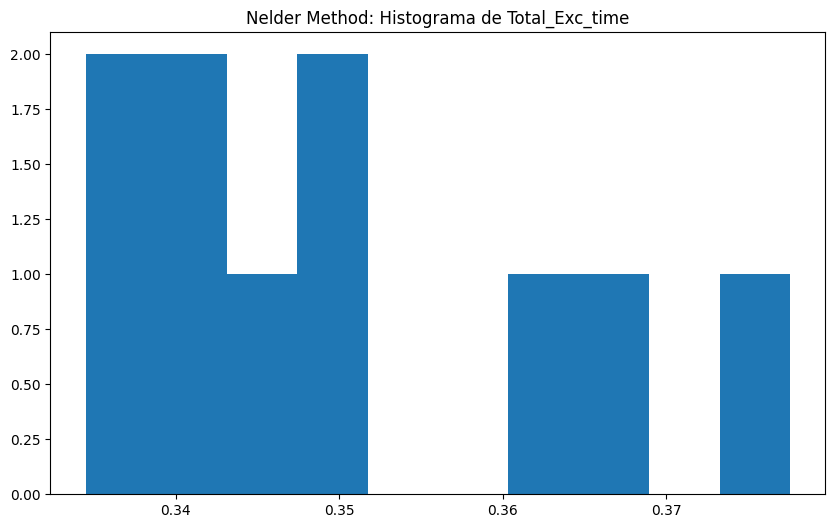

Nelder Method: Test Shapiro-Wilk para Total_Exc_time:
ShapiroResult(statistic=0.9108796217645883, pvalue=0.2870879191236198)
Nelder Method: Test Kolmogorov-Smirnov para Total_Exc_time:
KstestResult(statistic=0.630998854551708, pvalue=0.00021906626647021682, statistic_location=0.3345, statistic_sign=-1)


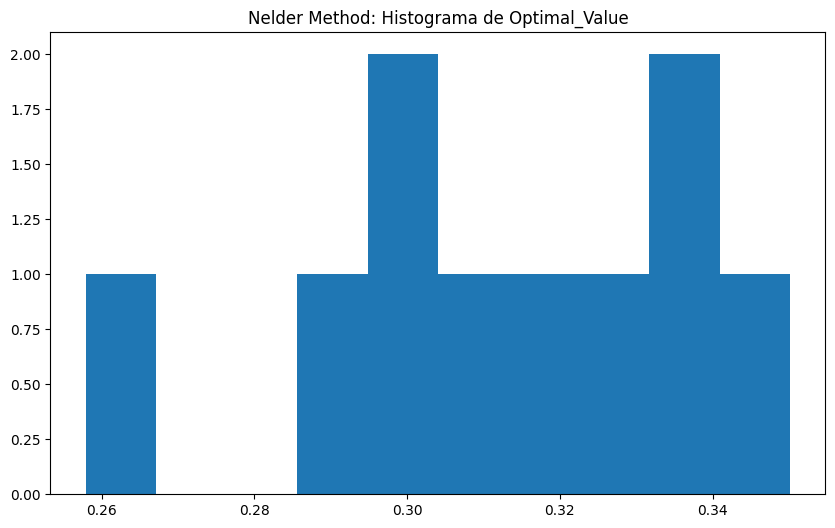

Nelder Method: Test Shapiro-Wilk para Optimal_Value:
ShapiroResult(statistic=0.9491440622956381, pvalue=0.6583837409782186)
Nelder Method: Test Kolmogorov-Smirnov para Optimal_Value:
KstestResult(statistic=0.6017687702533101, pvalue=0.0005391413493183202, statistic_location=0.2579280199911556, statistic_sign=-1)


In [59]:
def analyze_results(results, method_name):
    data = {
        'Method': [method_name] * 10,
        'Iteration': list(range(1, 11)),
        'Optimal_Value': [results[f'Optimal_Value_iteration_{i}'] for i in range(1, 11)],
        'Train_Accuracy': [results[f'Train_Accuracy_iteration_{i}'] for i in range(1, 11)],
        'Total_Exc_time': [results[f'Total_Exc_time_iteration_{i}'] for i in range(1, 11)]
    }

    df = pd.DataFrame(data)

    # Visualización y pruebas de normalidad
    metrics = ['Train_Accuracy', 'Total_Exc_time', 'Optimal_Value']
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        plt.hist(df[metric], bins=10)
        plt.title(f"{method_name}: Histograma de {metric}")
        plt.show()

        print(f"{method_name}: Test Shapiro-Wilk para {metric}:")
        print(stats.shapiro(df[metric]))

        print(f"{method_name}: Test Kolmogorov-Smirnov para {metric}:")
        print(stats.kstest(df[metric], 'norm'))

    return df

# Análisis para cada diccionario
df_grad_np = analyze_results(results_grad_np, "Grad NP")
df_grad_jnp = analyze_results(results_grad_jnp, "Grad JNP")
df_nelder_method = analyze_results(results_nelder_method, "Nelder Method")


In [60]:
from scipy.stats import mannwhitneyu

# Comparación entre results_grad_np y results_grad_jnp
# Train Accuracy
stat, p_value_train_accuracy_np_vs_jnp = mannwhitneyu(train_accuracy_np, train_accuracy_jnp, alternative='two-sided')
# Optimal Value
stat, p_value_optimal_value_np_vs_jnp = mannwhitneyu(optimal_value_np, optimal_value_jnp, alternative='two-sided')

# Determinar el mejor entre results_grad_np y results_grad_jnp
best_accuracy_group = train_accuracy_np if p_value_train_accuracy_np_vs_jnp < 0.05 else train_accuracy_jnp
best_optimal_value_group = optimal_value_np if p_value_optimal_value_np_vs_jnp < 0.05 else optimal_value_jnp

# Comparación del mejor con results_nelder_method
# Train Accuracy
stat, p_value_train_accuracy_best_vs_nelder = mannwhitneyu(best_accuracy_group, train_accuracy_nelder, alternative='two-sided')
# Optimal Value
stat, p_value_optimal_value_best_vs_nelder = mannwhitneyu(best_optimal_value_group, optimal_value_nelder, alternative='two-sided')

print(f"Prueba de Mann-Whitney-Wilcoxon para Train Accuracy entre GD NP y GD JNP:")
print(f"p-valor: {p_value_train_accuracy_np_vs_jnp:.5f}")
if p_value_train_accuracy_np_vs_jnp < 0.05:
    print("Hay una diferencia significativa entre GD NP y GD JNP para Train Accuracy.")
else:
    print("No hay una diferencia significativa entre GD NP y GD JNP para Train Accuracy.")

print(f"\nPrueba de Mann-Whitney-Wilcoxon para Optimal Value entre GD NP y GD JNP:")
print(f"p-valor: {p_value_optimal_value_np_vs_jnp:.5f}")
if p_value_optimal_value_np_vs_jnp < 0.05:
    print("Hay una diferencia significativa entre GD NP y GD JNP para Optimal Value.")
else:
    print("No hay una diferencia significativa entre GD NP y GD JNP para Optimal Value.")

print(f"\nPrueba de Mann-Whitney-Wilcoxon para Train Accuracy entre el mejor método y Nelder-Mead:")
print(f"p-valor: {p_value_train_accuracy_best_vs_nelder:.5f}")
if p_value_train_accuracy_best_vs_nelder < 0.05:
    print("Hay una diferencia significativa entre el mejor método y Nelder-Mead para Train Accuracy.")
else:
    print("No hay una diferencia significativa entre el mejor método y Nelder-Mead para Train Accuracy.")

print(f"\nPrueba de Mann-Whitney-Wilcoxon para Optimal Value entre el mejor método y Nelder-Mead:")
print(f"p-valor: {p_value_optimal_value_best_vs_nelder:.5f}")
if p_value_optimal_value_best_vs_nelder < 0.05:
    print("Hay una diferencia significativa entre el mejor método y Nelder-Mead para Optimal Value.")
else:
    print("No hay una diferencia significativa entre el mejor método y Nelder-Mead para Optimal Value.")


Prueba de Mann-Whitney-Wilcoxon para Train Accuracy entre GD NP y GD JNP:
p-valor: 0.46658
No hay una diferencia significativa entre GD NP y GD JNP para Train Accuracy.

Prueba de Mann-Whitney-Wilcoxon para Optimal Value entre GD NP y GD JNP:
p-valor: 0.00018
Hay una diferencia significativa entre GD NP y GD JNP para Optimal Value.

Prueba de Mann-Whitney-Wilcoxon para Train Accuracy entre el mejor método y Nelder-Mead:
p-valor: 0.02150
Hay una diferencia significativa entre el mejor método y Nelder-Mead para Train Accuracy.

Prueba de Mann-Whitney-Wilcoxon para Optimal Value entre el mejor método y Nelder-Mead:
p-valor: 0.00018
Hay una diferencia significativa entre el mejor método y Nelder-Mead para Optimal Value.


In [64]:
df_grad_np

,Method,Iteration,Optimal_Value,Train_Accuracy,Total_Exc_time
0,Grad NP,1,0.398678,82.978723,0.3345
1,Grad NP,2,0.437316,80.851064,0.3345
2,Grad NP,3,0.409571,82.978723,0.3345
3,Grad NP,4,0.400851,85.106383,0.3345
4,Grad NP,5,0.388436,86.170213,0.3345
5,Grad NP,6,0.415646,82.978723,0.3345
6,Grad NP,7,0.422744,84.042553,0.3345
7,Grad NP,8,0.374945,84.042553,0.3345
8,Grad NP,9,0.438963,77.659574,0.3345
9,Grad NP,10,0.398627,86.170213,0.3345


In [63]:
df_grad_np['Train_Accuracy'].mean() , df_grad_jnp['Train_Accuracy'].mean(), df_nelder_method['Train_Accuracy'].mean()

(83.29787234042553, 84.36170212765958, 86.70212765957447)

In [65]:
df_grad_np['Optimal_Value'].mean() , df_grad_jnp['Optimal_Value'].mean(), df_nelder_method['Optimal_Value'].mean()

(0.4085777394653749, 0.3421183735132217, 0.31388270316756167)